In [1]:
#招商银行理财产品数据（代码及分析）
#https://mp.weixin.qq.com/s?__biz=MzIxNjA2ODUzNg==&mid=2651436172&idx=1&sn=f075381f8d9371f65695d60100c8a549&chksm=8c73ac5bbb04254d9089f740a28fdeab59ca639e0e3ec2038c8a05ac649a13b145614a537bd2#rd
import pandas as pd

In [2]:
cmb = pd.read_excel('CMB_Finance.xlsx')
cmb.shape

(1120, 19)

In [3]:
cmb.head()

,AreaCode,BeginDate,EndDate,ExpireDate,FinDate,IncresingMoney,InitMoney,IsCanBuy,IsNewFlag,NetValue,ProdCode,ProdName,Risk,SaleChannel,SaleChannelName,Status,Style,Term,TypeCode
0,NaN,2017-11-21,2017-11-27,2018-03-05,97天,10000,50000,False,False,4.85%,1202157,增利系列1202157号-北京分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007
1,全行,2017-11-21,2017-11-24,2018-11-27,365天,100000,200000,False,False,NaN,9968,债券积极套利57号,R3(平衡型),4,网点,A,固定收益型,181天-365天（含）,10007
2,NaN,2017-11-20,2017-11-26,2018-03-13,106天,10000,100000,True,False,4.85%,1202229,增利系列1202229号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007
3,NaN,2017-11-20,2017-11-26,2018-02-02,67天,10000,100000,True,False,4.76%,1202230,增利系列1202230号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,31天-90天（含）,10007
4,NaN,2017-11-20,2017-11-27,2018-03-20,112天,10000,100000,True,False,4.90%,1202231,增利系列1202231号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007


In [4]:
cmb.dtypes

AreaCode           object
BeginDate          object
EndDate            object
ExpireDate         object
FinDate            object
IncresingMoney      int64
InitMoney           int64
IsCanBuy             bool
IsNewFlag            bool
NetValue           object
ProdCode           object
ProdName           object
Risk               object
SaleChannel        object
SaleChannelName    object
Status             object
Style              object
Term               object
TypeCode            int64
dtype: object

In [5]:
# 将FinDate 和 NetValue转换成 数值类型
cmb.FinDate = cmb.FinDate.str[:-1].astype('int')
cmb.NetValue = cmb.NetValue.str[:-1].astype('float')/100

In [6]:
cmb.head()

,AreaCode,BeginDate,EndDate,ExpireDate,FinDate,IncresingMoney,InitMoney,IsCanBuy,IsNewFlag,NetValue,ProdCode,ProdName,Risk,SaleChannel,SaleChannelName,Status,Style,Term,TypeCode
0,NaN,2017-11-21,2017-11-27,2018-03-05,97,10000,50000,False,False,0.0485,1202157,增利系列1202157号-北京分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007
1,全行,2017-11-21,2017-11-24,2018-11-27,365,100000,200000,False,False,NaN,9968,债券积极套利57号,R3(平衡型),4,网点,A,固定收益型,181天-365天（含）,10007
2,NaN,2017-11-20,2017-11-26,2018-03-13,106,10000,100000,True,False,0.0485,1202229,增利系列1202229号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007
3,NaN,2017-11-20,2017-11-26,2018-02-02,67,10000,100000,True,False,0.0476,1202230,增利系列1202230号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,31天-90天（含）,10007
4,NaN,2017-11-20,2017-11-27,2018-03-20,112,10000,100000,True,False,0.0490,1202231,增利系列1202231号-深圳分行销售,R2(稳健型),1|2|3|4,网上|手机|PAD|网点,A,固定收益型,91天-180天（含）,10007


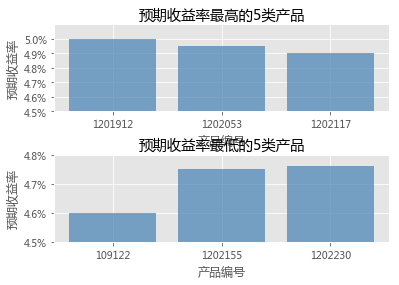

In [34]:
#收益率最高和最低的3种产品分析
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
NetValue_sort_desc = cmb[['ProdCode', 'NetValue']].sort_values(by = 'NetValue',ascending=False)
NetValue_duplicate_top = NetValue_sort_desc.drop_duplicates(subset = 'NetValue').head(3)

#预期收益率最低的3个产品
NetValue_sort_asc = cmb[['ProdCode', 'NetValue']].sort_values(by = 'NetValue', ascending=True)
NetValue_duplicate_last = NetValue_sort_asc.drop_duplicates(subset = 'NetValue').head(3)

# 中文和负号的正常显示
plt.rcParams['font.sans-serif']    = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形的显示风格
plt.style.use('ggplot')

# 为了让多张子图在一张图中完成，设置子图的位置
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

# 绘制条形图
ax1.bar(range(3), NetValue_duplicate_top.NetValue, align = 'center', color = 'steelblue', alpha = 0.7)
# y轴范围
ax1.set_ylim(0.045,0.051)
# x轴刻度标签
ax1.set_xticks(np.arange(3)) 
ax1.set_xticklabels(NetValue_duplicate_top.ProdCode)
# x轴标签
ax1.set_xlabel('产品编号')
# y轴刻度标签
ax1.set_yticks(np.arange(0.045,0.051,0.001))
ax1.set_yticklabels([str(i*100) + '%' for i in np.arange(0.045,0.051,0.001)])
# y轴标签
ax1.set_ylabel('预期收益率')
# 标题
ax1.set_title('预期收益率最高的5类产品')

ax2.bar(range(3), NetValue_duplicate_last.NetValue,  align = 'center',color = 'steelblue', alpha = 0.7)
ax2.set_ylim(0.045,0.048)
ax2.set_xticks(np.arange(3)) 
ax2.set_xticklabels(NetValue_duplicate_last.ProdCode)
# x轴标签
ax2.set_xlabel('产品编号')
# y轴刻度标签
ax2.set_yticks(np.arange(0.045,0.048,0.001))    
ax2.set_yticklabels([str(i*100) + '%' for i in np.arange(0.045,0.048,0.001)])
# y轴标签
ax2.set_ylabel('预期收益率')
ax2.set_title('预期收益率最低的5类产品')

# 调整子图之间的高度间距
plt.subplots_adjust(hspace=0.5)
# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 图形显示
plt.show()

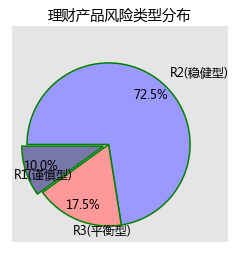

In [20]:
# 先对各风险类型的样本量作统计
stats = cmb.Risk.value_counts()
plt.axes(aspect='equal')
# 控制x轴和y轴的范围
plt.xlim(0,4)
plt.ylim(0,4)

explode = [0,0,0.1,]  
colors=['#9999ff','#ff9999','#7777aa'] # 自定义颜色

# 绘制饼图
plt.pie(x = stats.values, # 绘图数据
        explode=explode, # 突出显示谨慎性产品
        labels=stats.index, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.15, 
        startangle = 180, # 设置饼图的初始角度
        radius = 1.5, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'}, # 设置文本标签的属性值
        center = (1.8,1.8), # 设置饼图的原点
        frame = 1 )# 是否显示饼图的图框，这里设置显示

# 删除x轴和y轴的刻度
plt.xticks(())
plt.yticks(())

# 添加图标题
plt.title('理财产品风险类型分布')
# 显示图形
plt.show()

In [19]:
stats

R2(稳健型)    812
R3(平衡型)    196
R1(谨慎型)    112
Name: Risk, dtype: int64

In [21]:
# 理财产品期限的描述性统计
cmb.FinDate.describe()

count    1120.000000
mean      181.050000
std       291.563627
min        32.000000
25%        70.000000
50%       101.500000
75%       179.250000
max      1826.000000
Name: FinDate, dtype: float64

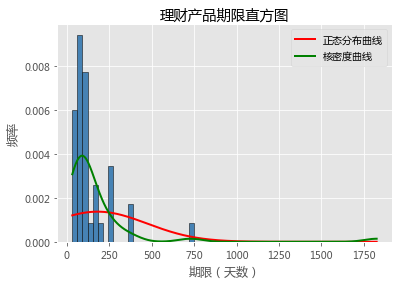

In [24]:
# 理财产品期限的直方图
plt.hist(cmb.FinDate, # 绘图数据
        bins = np.arange(cmb.FinDate.min(),cmb.FinDate.max(),30), # 指定直方图的组距
        normed = True, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

# 设置坐标轴标签和标题
plt.title('理财产品期限直方图')
plt.xlabel('期限（天数）')
plt.ylabel('频率')

# 生成正态曲线的数据
x1 = np.linspace(cmb.FinDate.min(), cmb.FinDate.max(), 1000)
normal = mlab.normpdf(x1, cmb.FinDate.mean(), cmb.FinDate.std())
# 绘制正态分布曲线
line1, = plt.plot(x1,normal,'r-', linewidth = 2) 

# 生成核密度曲线的数据
kde = mlab.GaussianKDE(cmb.FinDate)
x2 = np.linspace(cmb.FinDate.min(), cmb.FinDate.max(), 1000)
# 绘制
line2, = plt.plot(x2,kde(x2),'g-', linewidth = 2)

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图例
plt.legend([line1, line2],['正态分布曲线','核密度曲线'],loc='best')
# 显示图形
plt.show()

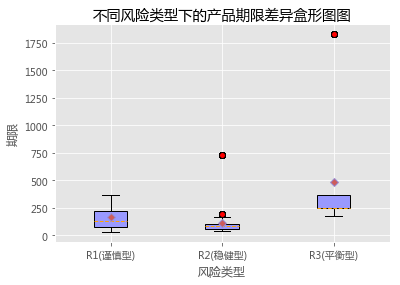

In [30]:
#基于风险类型的期限分布
#我们可以进一步细化，看看不同类型风险的产品，是不是产品期限存在明显的差异，这里我们就借助于箱线图做一个比较：
# 如果将其划分到不同的Risk（风险类型）中，期限的分布是否存在差异
FinDate = []
Risks = cmb.Risk.unique()
Risks.sort()

for Risk in Risks:
    FinDate.append(cmb.loc[cmb.Risk==Risk,'FinDate'])

# 绘图
plt.boxplot(x = FinDate, 
            patch_artist = True,
            labels    = Risks, # 添加具体的标签名称
            showmeans = True, 
            boxprops   = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops  = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 设置坐标轴标签和标题
plt.title('不同风险类型下的产品期限差异盒形图图')
plt.xlabel('风险类型')
plt.ylabel('期限')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图形
plt.show()